In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
#load data
df = pd.read_csv('census_income_dataset.csv')
df.head()

,Unnamed: 0,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION-NUM,MARITAL STATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK,NATIVE-COUNTRY,SALARY
0,0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


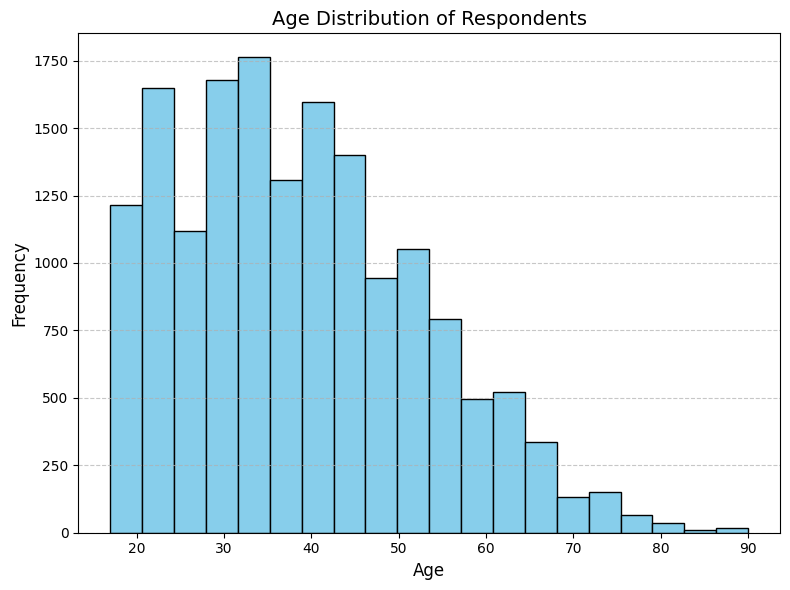

In [ ]:
# Task 1a: Age Distribution
plt.figure(figsize=(8, 6))
plt.hist(df['AGE'], bins=20, edgecolor='black', color='skyblue')
plt.title('Age Distribution of Respondents', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('age_distribution.svg')  # Save as vector graphic
plt.show()

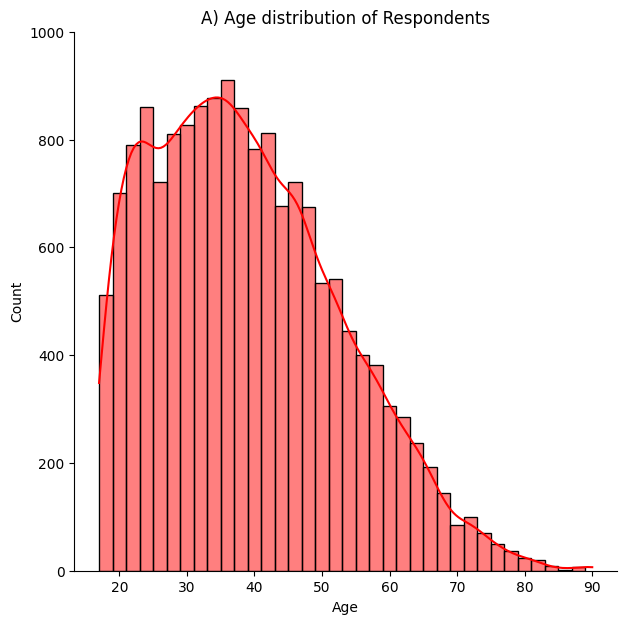

In [17]:
import seaborn as sns

bins = np.arange(17, 90, 2)

plt.figure(figsize=(7, 7))

plt.title("A) Age distribution of Respondents")
# sns.histplot(df, x="AGE", bins=bins, kde=True)

# Set unique colors for histogram and KDE
hist_color = 'blue'
kde_color = 'orange'

sns.histplot(df, x="AGE", bins=bins, kde=True, color='red')
plt.rcParams['svg.fonttype'] ='none'
plt.xlabel("Age")
plt.ylim([0,1000])
sns.despine(trim=False)
# Save as SVG
plt.savefig("age_histogram.svg", bbox_inches="tight")
plt.show()


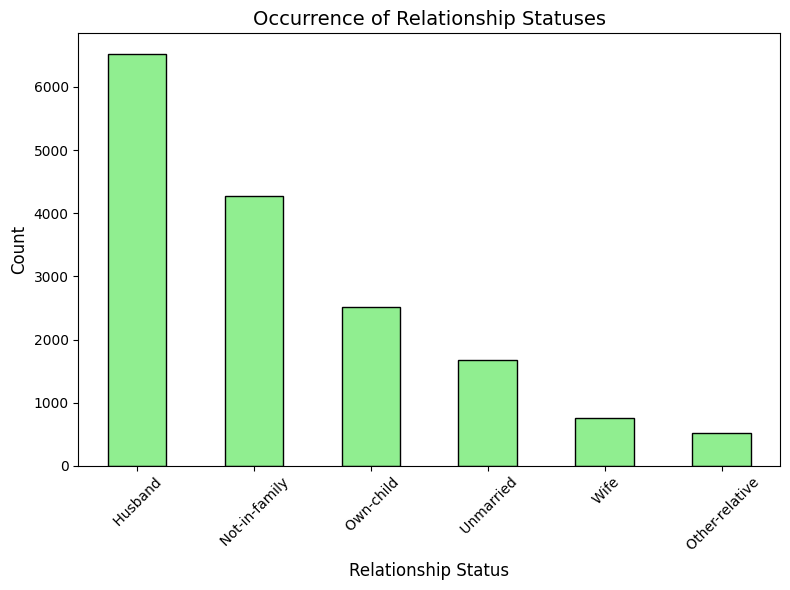

In [6]:
# Task 1b: Relationship Status Occurrence
relationship_counts = df['RELATIONSHIP'].value_counts()
plt.figure(figsize=(8, 6))
relationship_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Occurrence of Relationship Statuses', fontsize=14)
plt.xlabel('Relationship Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.savefig('relationship_status.svg')  # Save as vector graphic
plt.show()

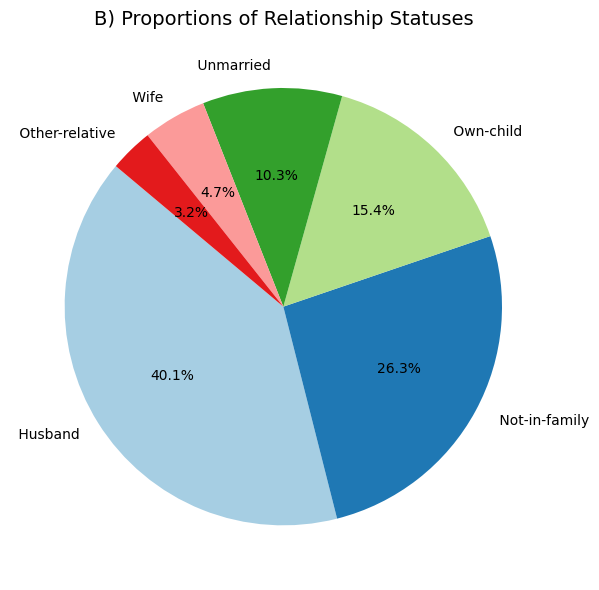

In [18]:
# Task 1b: Relationship Status Occurrence (Pie Chart)
relationship_counts = df['RELATIONSHIP'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(relationship_counts, labels=relationship_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('B) Proportions of Relationship Statuses', fontsize=14)
plt.tight_layout()
plt.savefig('relationship_status.svg')  # Save as vector graphic
plt.show()

0     <=50K
1     <=50K
2      >50K
3      >50K
4     <=50K
Name: SALARY_NUMERIC, dtype: object


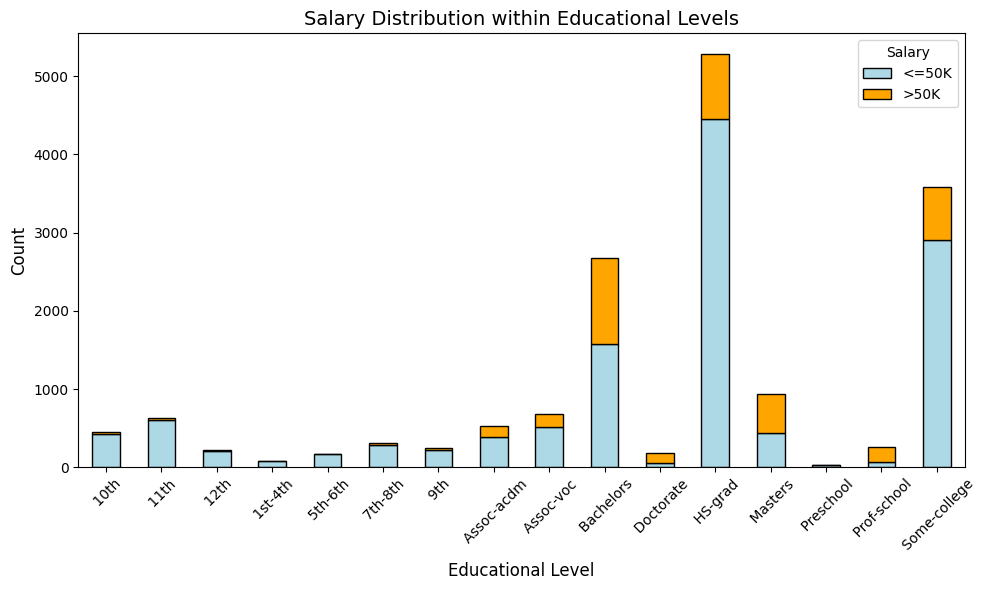

In [ ]:
# Task 1c: Salary Distribution within Educational Levels
# Map salary to numeric values for grouping
df['SALARY_NUMERIC'] = df['SALARY']#.map({'<=50K': 0, '>50K': 1})
edu_salary = df.groupby(['EDUCATION', 'SALARY_NUMERIC']).size().unstack(fill_value=0)

# Plot stacked bar chart
edu_salary.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightblue', 'orange'], edgecolor='black')
plt.title('Salary Distribution within Educational Levels', fontsize=14)
plt.xlabel('Educational Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(['<=50K', '>50K'], title='Salary', fontsize=10)
plt.tight_layout()
plt.savefig('education_salary.svg')  # Save as vector graphic
plt.show()

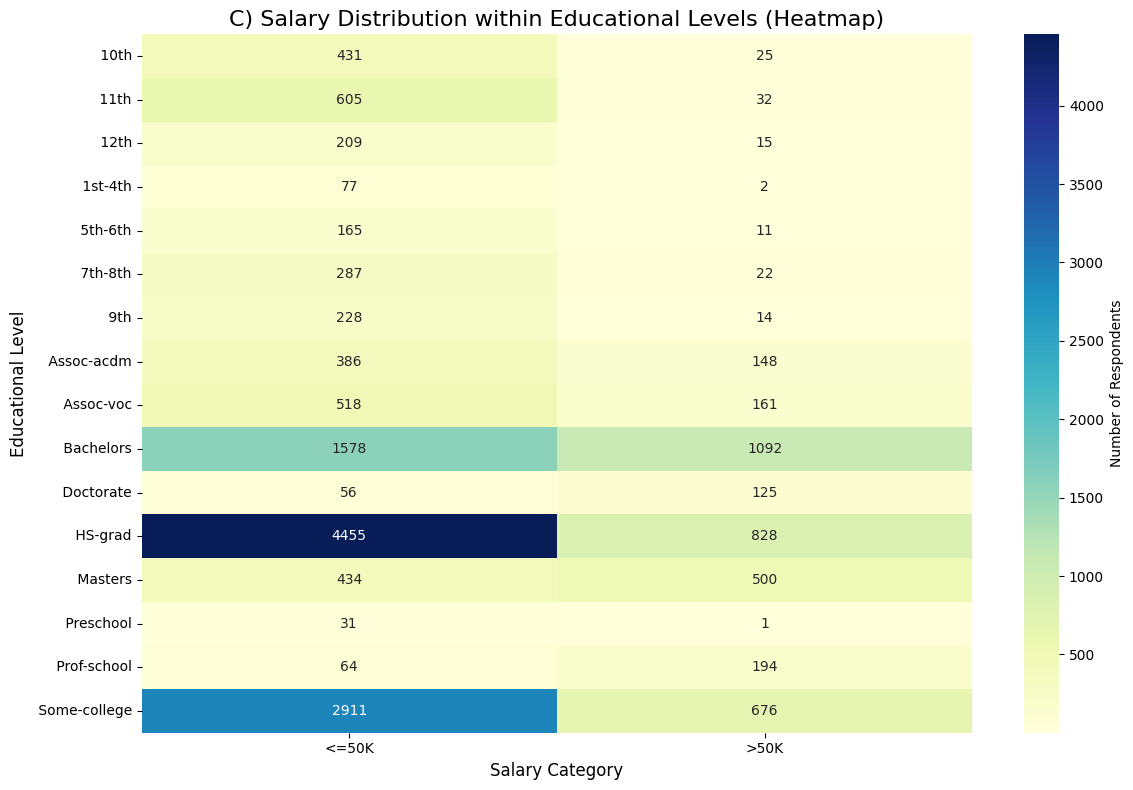

In [20]:
df['SALARY_NUMERIC'] = df['SALARY']

# Group data by education and salary_numeric, and count occurrences
grouped_data = df.groupby(['EDUCATION', 'SALARY_NUMERIC']).size().reset_index(name='count')

# Pivot the grouped data for heatmap compatibility
pivot_data = grouped_data.pivot(index='EDUCATION', columns='SALARY_NUMERIC', values='count').fillna(0)

# Rename columns for clarity
pivot_data.columns = ['<=50K', '>50K']

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, annot=True, fmt="g", cmap="YlGnBu", cbar_kws={'label': 'Number of Respondents'})
plt.title('C) Salary Distribution within Educational Levels (Heatmap)', fontsize=16)
plt.xlabel('Salary Category', fontsize=12)
plt.ylabel('Educational Level', fontsize=12)
plt.xticks(ticks=[0.5, 1.5], labels=['<=50K', '>50K'], rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Save the heatmap as SVG
plt.savefig('education_salary_heatmap.svg')
plt.show()